# Análise de dados

In [1]:
# Configurações
DATA_CSV = 'TE-SLD_v1-4a_shuffled_balanced.csv'
DATA_FRMT = 'wav'
DATASET = 'SLD_v1-4a'
GROUP = 'test'
RANDOM_SAMPLES = 50  # Use None to load all dataset

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import IPython.display as ipd  # To play sound in the notebook
import plotly.graph_objs as go
import plotly.offline as offline
import plotly.tools as tls
import wave
import librosa
import os
import glob
import pandas
import tqdm
import random
from tqdm import tqdm_notebook
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile

In [3]:
%matplotlib inline 
color = sns.color_palette()
py.init_notebook_mode(connected=True)
offline.init_notebook_mode()

In [4]:
data = pandas.read_csv(DATA_CSV)
data.columns = ['file_path', 'label']

In [5]:
# Fix the path
data['file_path'] = data['file_path'].apply(lambda fp: fp[23:])

In [6]:
data.head()

file_path   label
0  test/de\de_m_92355\de_m_92355__rmx__lp6000.00_...  deutch
1  test/de\de_m_92355\de_m_92355__rmx__lp6000.00_...  deutch
2  test/de\de_m_92355\de_m_92355__rmx__lp6000.00_...  deutch
3  test/de\de_m_92355\de_m_92355__rmx__lp6000.00_...  deutch
4  test/de\de_f_63f5b\de_f_63f5b__rmx__lp6000.00_...  deutch

In [7]:
def load_wav_file(path):
    sr, b = wavfile.read(path)
    return sr, b

In [8]:
# Load data
if not RANDOM_SAMPLES:
    # Samples == data
    wavs = dict()
    wavs['time_series'] = []
    wavs['sample_rate'] = []
    for path in data['file_path']:
        sr, b = wavfile.read(path)
        wavs['time_series'].append(b)
        wavs['sample_rate'].append(sr)
    samples = pandas.DataFrame(wavs, columns = ['file_path', 'time_series', 'sample_rate'])
    samples['file_path'] = data['file_path']
else:
    # Load #RANDOM_SAMPLES samples
    samples = dict()
    samples['time_series'] = []
    samples['sample_rate'] = []
    df_samples = data.sample(RANDOM_SAMPLES)
    for path in df_samples['file_path']:
        sr, b = wavfile.read(path)
        samples['sample_rate'].append(sr)
        samples['time_series'].append(b)
    df_samples['sample_rate'] = samples['sample_rate']
    df_samples['time_series'] = samples['time_series']
    samples = df_samples
    
samples['label'] = data['label']
samples['nframes'] = samples['time_series'].apply(len)
# The file name is an abreviation
## WARNING: Be careful when changing the number of characters selected, because the analysis of 
## speakers was made based on the name of file
samples['file_name'] = samples['file_path'].apply(lambda p: p.split(os.sep)[-1])
samples.head(40)

file_path       label  \
159  test/pt\pt_m_d5ec2\pt_m_d5ec2__rmx__lp6000.00_...  portuguese   
203  test/es\es_f_50298\es_f_50298__rmx__lp6000.00_...     spanish   
131  test/pt\pt_f_aafca\pt_f_aafca__rmx__lp6000.00_...  portuguese   
171  test/es\es_f_50298\es_f_50298__rmx__lp6000.00_...     spanish   
202  test/es\es_m_08111\es_m_08111__rmx__lp6000.00_...     spanish   
185  test/es\es_m_08111\es_m_08111__rmx__lp6000.00_...     spanish   
74   test/en\en_f_67a0c\en_f_67a0c__rmx__lp6000.00_...     english   
117  test/fr\fr_m_f37f3\fr_m_f37f3__rmx__lp6000.00_...      french   
90   test/fr\fr_f_ea87a\fr_f_ea87a__rmx__lp6000.00_...      french   
166  test/pt\pt_m_d5ec2\pt_m_d5ec2__rmx__lp6000.00_...  portuguese   
113  test/fr\fr_f_ea87a\fr_f_ea87a__rmx__lp6000.00_...      french   
50   test/en\en_m_b74b2\en_m_b74b2__rmx__lp6000.00_...     english   
107  test/fr\fr_f_ea87a\fr_f_ea87a__rmx__lp6000.00_...      french   
16   test/de\de_m_92355\de_m_92355__rmx__lp6000.00_...      deutch   
105  test/fr\fr_f_ea87a\fr_f_ea87a__rmx__lp6000.00_...      french   
93   test/fr\fr_f_ea87a\fr_f_ea87a__rmx__lp6000.00_...      french   
10   test/de\de_m_92355\de_m_92355__rmx__lp6000.00_...      deutch   
170  test/pt\pt_f_aafca\pt_f_aafca__rmx__lp6000.00_...  portuguese   
83   test/en\en_f_67a0c\en_f_67a0c__rmx__lp6000.00_...     english   
162  test/pt\pt_m_d5ec2\pt_m_d5ec2__rmx__lp6000.00_...  portuguese   
207  test/es\es_m_08111\es_m_08111__rmx__lp6000.00_...     spanish   
69   test/en\en_f_67a0c\en_f_67a0c__rmx__lp6000.00_...     english   
190  test/es\es_m_08111\es_m_08111__rmx__lp6000.00_...     spanish   
146  test/pt\pt_f_aafca\pt_f_aafca__rmx__lp6000.00_...  portuguese   
196  test/es\es_m_08111\es_m_08111__rmx__lp6000.00_...     spanish   
66   test/en\en_m_b74b2\en_m_b74b2__rmx__lp6000.00_...     english   
7    test/de\de_m_92355\de_m_92355__rmx__lp6000.00_...      deutch   
45   test/en\en_m_b74b2\en_m_b74b2__rmx__lp6000.00_...     english   
27   test/de\de_f_63f5b\de_f_63f5b__rmx__lp6000.00_...      deutch   
125  test/fr\fr_m_f37f3\fr_m_f37f3__rmx__lp6000.00_...      french   
148  test/pt\pt_f_aafca\pt_f_aafca__rmx__lp6000.00_...  portuguese   
33   test/de\de_f_63f5b\de_f_63f5b__rmx__lp6000.00_...      deutch   
36   test/de\de_f_63f5b\de_f_63f5b__rmx__lp6000.00_...      deutch   
67   test/en\en_f_67a0c\en_f_67a0c__rmx__lp6000.00_...     english   
8    test/de\de_f_63f5b\de_f_63f5b__rmx__lp6000.00_...      deutch   
56   test/en\en_m_b74b2\en_m_b74b2__rmx__lp6000.00_...     english   
182  test/es\es_m_08111\es_m_08111__rmx__lp6000.00_...     spanish   
32   test/de\de_m_92355\de_m_92355__rmx__lp6000.00_...      deutch   
15   test/de\de_f_63f5b\de_f_63f5b__rmx__lp6000.00_...      deutch   
206  test/es\es_m_08111\es_m_08111__rmx__lp6000.00_...     spanish   

     sample_rate                                        time_series  nframes  \
159        16000  [-5814, -5665, -5369, -4513, -3843, -3748, -37...    80000   
203        16000  [3514, 3604, 3767, 3924, 4024, 4055, 4113, 415...    80000   
131        16000  [72, 72, 76, 68, 64, 62, 51, 46, 40, 39, 40, 3...    80000   
171        16000  [3117, 3126, 3121, 3114, 3097, 3079, 3071, 306...    80000   
202        16000  [1351, 1428, 1457, 1457, 1445, 1391, 1308, 124...    80000   
185        16000  [3606, 1315, -1243, -3025, -4405, -6476, -8237...    80000   
74         16000  [6, 9, 12, 9, 9, 15, 12, 12, 12, 12, 6, 9, 15,...    80000   
117        16000  [438, 595, 657, 778, 845, 851, 809, 780, 671, ...    80000   
90         16000  [159, 116, 87, 111, 125, 93, 72, 88, 116, 78, ...    80000   
166        16000  [59, 74, 58, 61, 65, 67, 62, 69, 78, 82, 65, 6...    80000   
113        16000  [-40, 968, -882, -1216, 806, -1741, -2565, 110...    80000   
50         16000  [-6645, -6413, -5651, -4683, -3789, -3031, -25...    80000   
107        16000  [24, 34, 29, 8, 3, 14, 3, -19, -20, -12, -14, ...    80000   
16         16000  [7389, 8145, 8833, 9128, 9488, 9853,

In [9]:
data['file_name'] = data['file_path'].apply(lambda p: p.split(os.sep)[-1][:-4][:24])
full_names = [x.split(os.sep)[-1] for x in data['file_path']]
# Data augmentation
def gftrv(full_n, feature):
    x = full_n.split(feature, 1)
    if len(x) > 1:
        if feature == 'lp':
            return x[1].split('_')[0]
        return x[1].split('_')[1]
    return None
speeds = [gftrv(x, '_sp') for x in full_names]
pitches = [gftrv(x, '_pt') for x in full_names]
noises = [gftrv(x, '_ns') for x in full_names]
low_pass = [gftrv(x, '_lp') for x in full_names]
data['speed_changing'] = speeds
data['pitch_changing'] = pitches
data['noise_add'] = noises
data['low_pass'] = low_pass
data['augmented_data'] = list(map(lambda x: x[0] is not None or x[1] is not None or x[2] is not None or x[3] is not None,
                                 list(zip(speeds, pitches, noises, low_pass))))
export_csv = data.to_csv (r'[DF]{}'.format(DATA_CSV), index = None, header=True)  


In [10]:
data.head()

file_path   label  \
0  test/de\de_m_92355\de_m_92355__rmx__lp6000.00_...  deutch   
1  test/de\de_m_92355\de_m_92355__rmx__lp6000.00_...  deutch   
2  test/de\de_m_92355\de_m_92355__rmx__lp6000.00_...  deutch   
3  test/de\de_m_92355\de_m_92355__rmx__lp6000.00_...  deutch   
4  test/de\de_f_63f5b\de_f_63f5b__rmx__lp6000.00_...  deutch   

                  file_name speed_changing pitch_changing noise_add low_pass  \
0  de_m_92355__rmx__lp6000.           None           None      None            
1  de_m_92355__rmx__lp6000.           None           None      None            
2  de_m_92355__rmx__lp6000.           None           None      None            
3  de_m_92355__rmx__lp6000.           None           None      None            
4  de_f_63f5b__rmx__lp6000.           None           None      None            

   augmented_data  
0            True  
1            True  
2            True  
3            True  
4            True

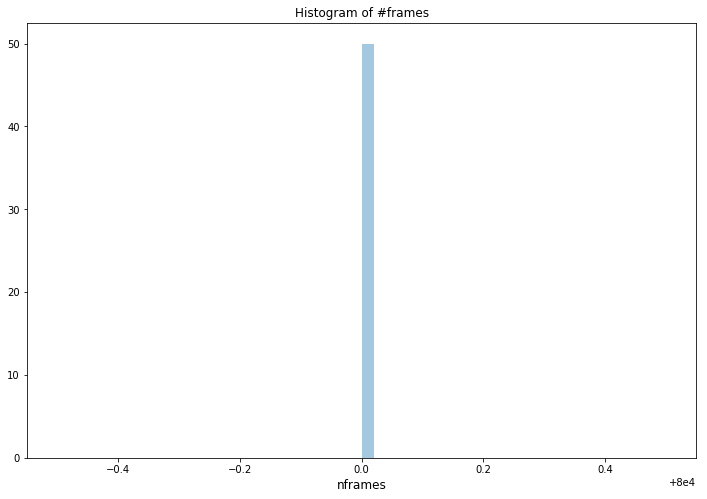

In [11]:
plt.figure(figsize=(12,8))
sns.distplot(samples.nframes.values, bins=50, kde=False)
plt.xlabel('nframes', fontsize=12)
plt.title("Histogram of #frames")
plt.show()

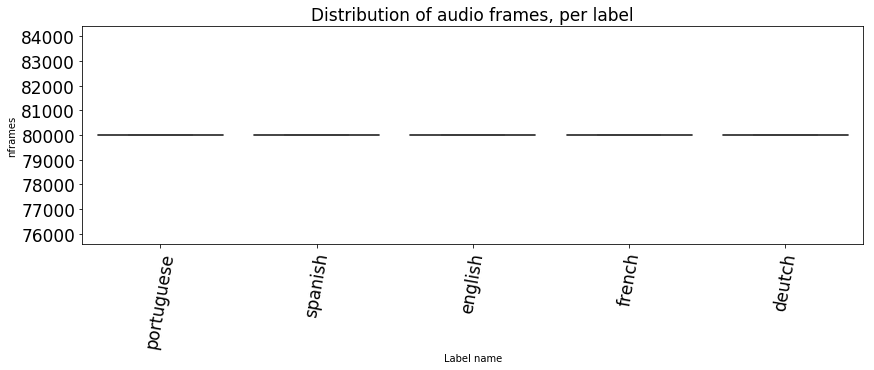

In [12]:
plt.figure(figsize=(14,4))
boxplot = sns.boxplot(x="label", y="nframes", data=samples)
boxplot.set(xlabel='', ylabel='')
plt.title('Distribution of audio frames, per label', fontsize=17)
plt.xticks(rotation=80, fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('Label name')
plt.ylabel('nframes')
plt.show()

In [13]:
temp = data.sort_values(by='label')
temp.head()

file_path   label  \
0   test/de\de_m_92355\de_m_92355__rmx__lp6000.00_...  deutch   
23  test/de\de_m_92355\de_m_92355__rmx__lp6000.00_...  deutch   
24  test/de\de_f_63f5b\de_f_63f5b__rmx__lp6000.00_...  deutch   
25  test/de\de_f_63f5b\de_f_63f5b__rmx__lp6000.00_...  deutch   
26  test/de\de_f_63f5b\de_f_63f5b__rmx__lp6000.00_...  deutch   

                   file_name speed_changing pitch_changing noise_add low_pass  \
0   de_m_92355__rmx__lp6000.           None           None      None            
23  de_m_92355__rmx__lp6000.           None           None      None            
24  de_f_63f5b__rmx__lp6000.           None           None      None            
25  de_f_63f5b__rmx__lp6000.           None           None      None            
26  de_f_63f5b__rmx__lp6000.           None           None      None            

    augmented_data  
0             True  
23            True  
24            True  
25            True  
26            True

In [14]:
def get_index_label(label):
    for i, ins in enumerate(temp['label']):
        if ins == label:
            return i
get_index_label('english')

42

Total number of labels in training data :  5
Labels are :  ['deutch' 'english' 'french' 'portuguese' 'spanish']


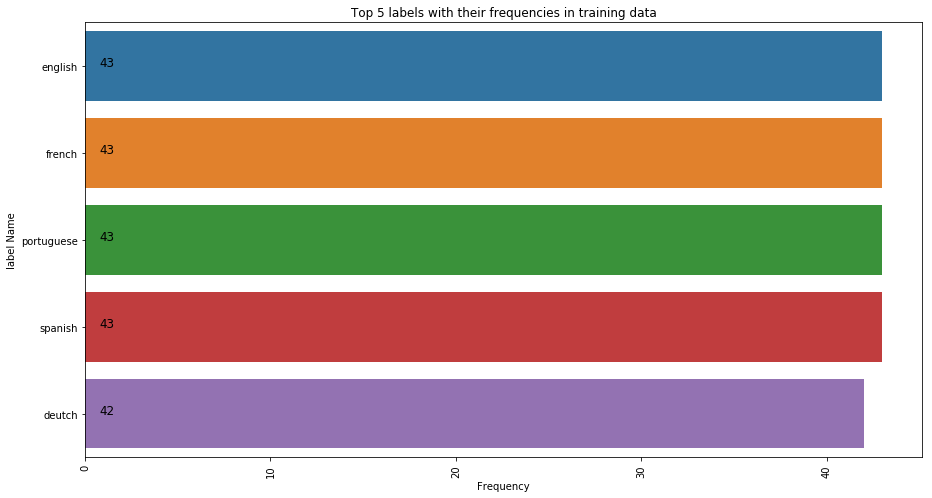

In [15]:
print("Total number of labels in training data : ",len(data['label'].value_counts()))
print("Labels are : ", data['label'].unique())
plt.figure(figsize=(15,8))
audio_type = data['label'].value_counts().head(5)
sns.barplot(audio_type.values, audio_type.index)
for i, v in enumerate(audio_type.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xticks(rotation='vertical')
plt.xlabel('Frequency')
plt.ylabel('label Name')
plt.title("Top 5 labels with their frequencies in training data")
plt.show()

In [16]:
data['gender'] = data['file_name'].apply(lambda n: n.split('_')[1])

## Instâncias por idioma

In [17]:
temp = data['label'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Instances by language')
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

## Instâncias por quantidade de frames (amostras)

In [18]:
temp = samples['nframes'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Instances by Frames')
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

## Instâncias por sample rate (amostras)

In [19]:
temp = samples['sample_rate'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Instances by Frames')
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

## Instâncias por duração total (amostras)

In [20]:
def duration(nframes, sample_rate):
    return sample_rate / nframes

In [21]:
samples['duration'] = pandas.DataFrame([duration(sr, b) for sr, b
                                        in zip(samples['sample_rate'], 
                                               samples['nframes'])])
temp = samples['duration'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Instances by duration')
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

## Instâncias por gênero

In [22]:
temp = data['gender'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Instances by Gender')
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

## Instâncias por contagem de locutores

In [23]:
speakers_count = dict()
for lang in data['label']:
    speakers_count[lang] = 0
counted = set()
for lang, fname in zip(data['label'], data['file_name']):
    if fname not in counted:
        speakers_count[lang] += 1
        counted.add(fname)
        
df_spk = pandas.DataFrame(data=list(zip(speakers_count.keys() ,speakers_count.values())), 
                          columns=['label', 'Speakers (count)'])
df_spk.head()

label  Speakers (count)
0      deutch                 2
1     english                 2
2      french                 2
3  portuguese                 2
4     spanish                 2

In [24]:
temp = df_spk['Speakers (count)']
labels = df_spk['label']
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Instances by Speaker (count)')
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

## Instâncias por locutores

count
label   file_name                      
deutch  de_f_63f5b__rmx__lp6000.     22
        de_m_92355__rmx__lp6000.     20
english en_f_67a0c__rmx__lp6000.     21
        en_m_b74b2__rmx__lp6000.     22
french  fr_f_ea87a__rmx__lp6000.     22

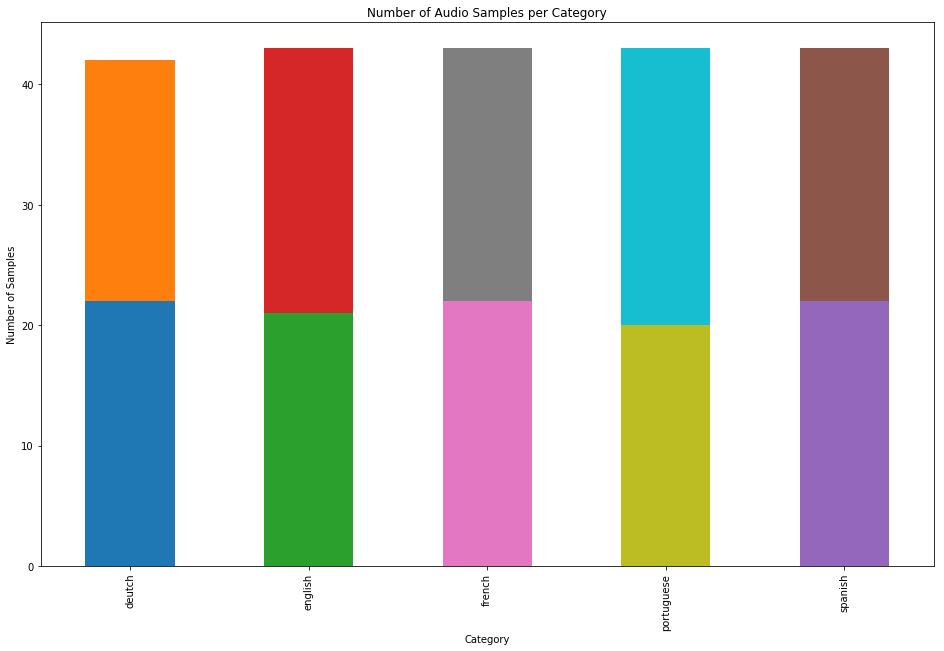

In [25]:
temp = pandas.DataFrame(zip(data['file_path'], data['label'], data['file_name']), 
                        columns=['count', 'label', 'file_name'])
category_group = temp.groupby(['label', 'file_name']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,10))
plot.set_xlabel("Category")
plot.set_ylabel("Number of Samples");
plot.get_legend().remove()
category_group.head()

## Instâncias por idioma e gênero

count
label      gender       
deutch     f          22
           m          20
english    f          21
           m          22
french     f          22
           m          21
portuguese f          20
           m          23
spanish    f          22
           m          21

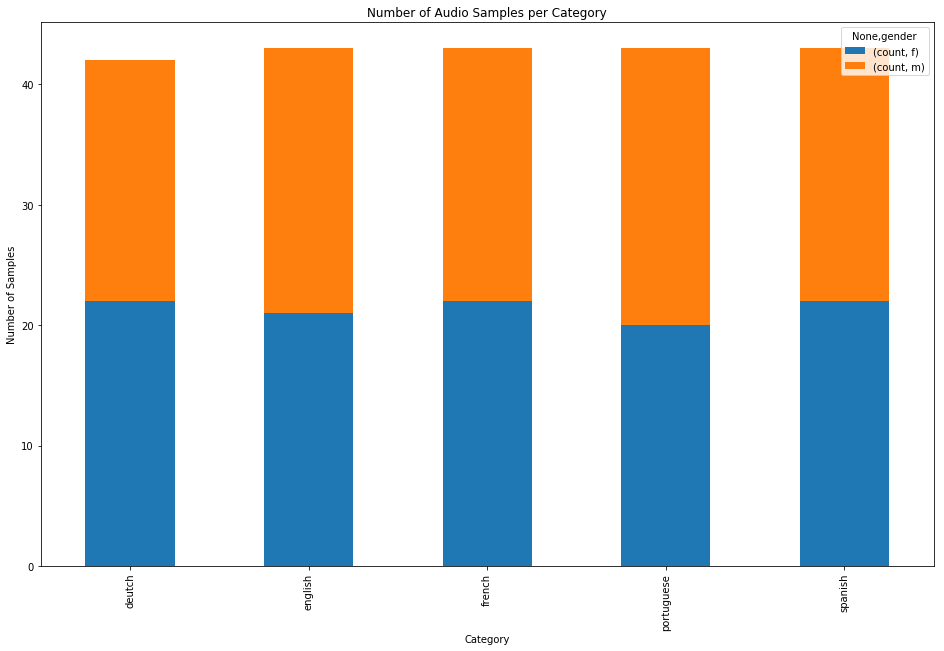

In [26]:
temp = pandas.DataFrame(zip(data['file_path'], data['label'], data['gender']), 
                        columns=['count', 'label', 'gender'])
category_group = temp.groupby(['label', 'gender']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,10))
plot.set_xlabel("Category")
plot.set_ylabel("Number of Samples");
category_group

## Instâncias por _data augmentation_

In [27]:
temp = data['augmented_data'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Instances by Data Augmentation')
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

## Instâncias por idioma e _data augmentation_

count
label      augmented_data       
deutch     True               42
english    True               43
french     True               43
portuguese True               43
spanish    True               43

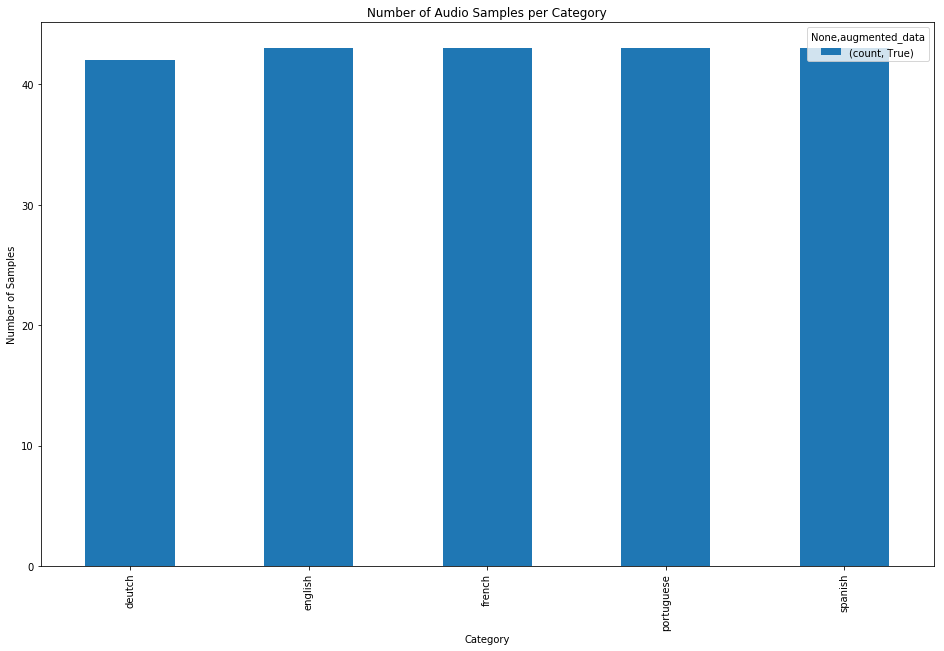

In [28]:
temp = pandas.DataFrame(zip(data['file_name'], data['label'], data['augmented_data']), 
                        columns=['count', 'label', 'augmented_data'])
category_group = temp.groupby(['label', 'augmented_data']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,10))
plot.set_xlabel("Category")
plot.set_ylabel("Number of Samples");
category_group

count  speed_changing  pitch_changing  noise_add  \
label      augmented_data                                                     
deutch     True               42               0               0          0   
english    True               43               0               0          0   
french     True               43               0               0          0   
portuguese True               43               0               0          0   
spanish    True               43               0               0          0   

                           low_pass  
label      augmented_data            
deutch     True                  42  
english    True                  43  
french     True                  43  
portuguese True                  43  
spanish    True                  43

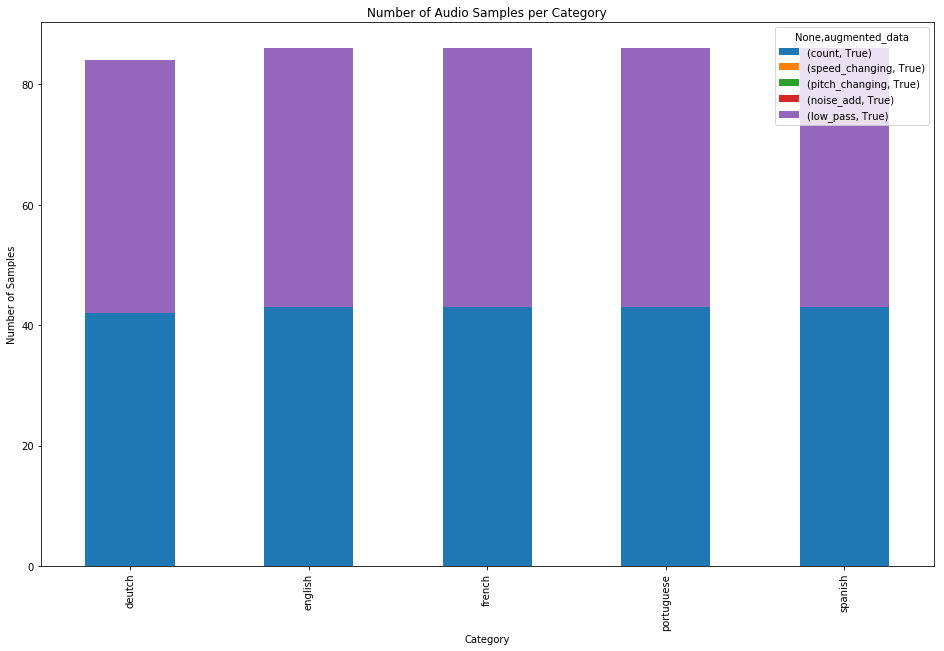

In [29]:
temp = pandas.DataFrame(zip(data['file_name'], data['label'], data['speed_changing'],
                            data['pitch_changing'], data['noise_add'], data['low_pass'], data['augmented_data']), 
                        columns=['count', 'label', 'speed_changing', 'pitch_changing', 'noise_add', 'low_pass',
                                'augmented_data'])
category_group = temp.groupby(['label', 'augmented_data']).count()
#category_group = category_group[category_group.speed_changing != 0]
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,10))
plot.set_xlabel("Category")
plot.set_ylabel("Number of Samples");
category_group.head()

## Waveform 

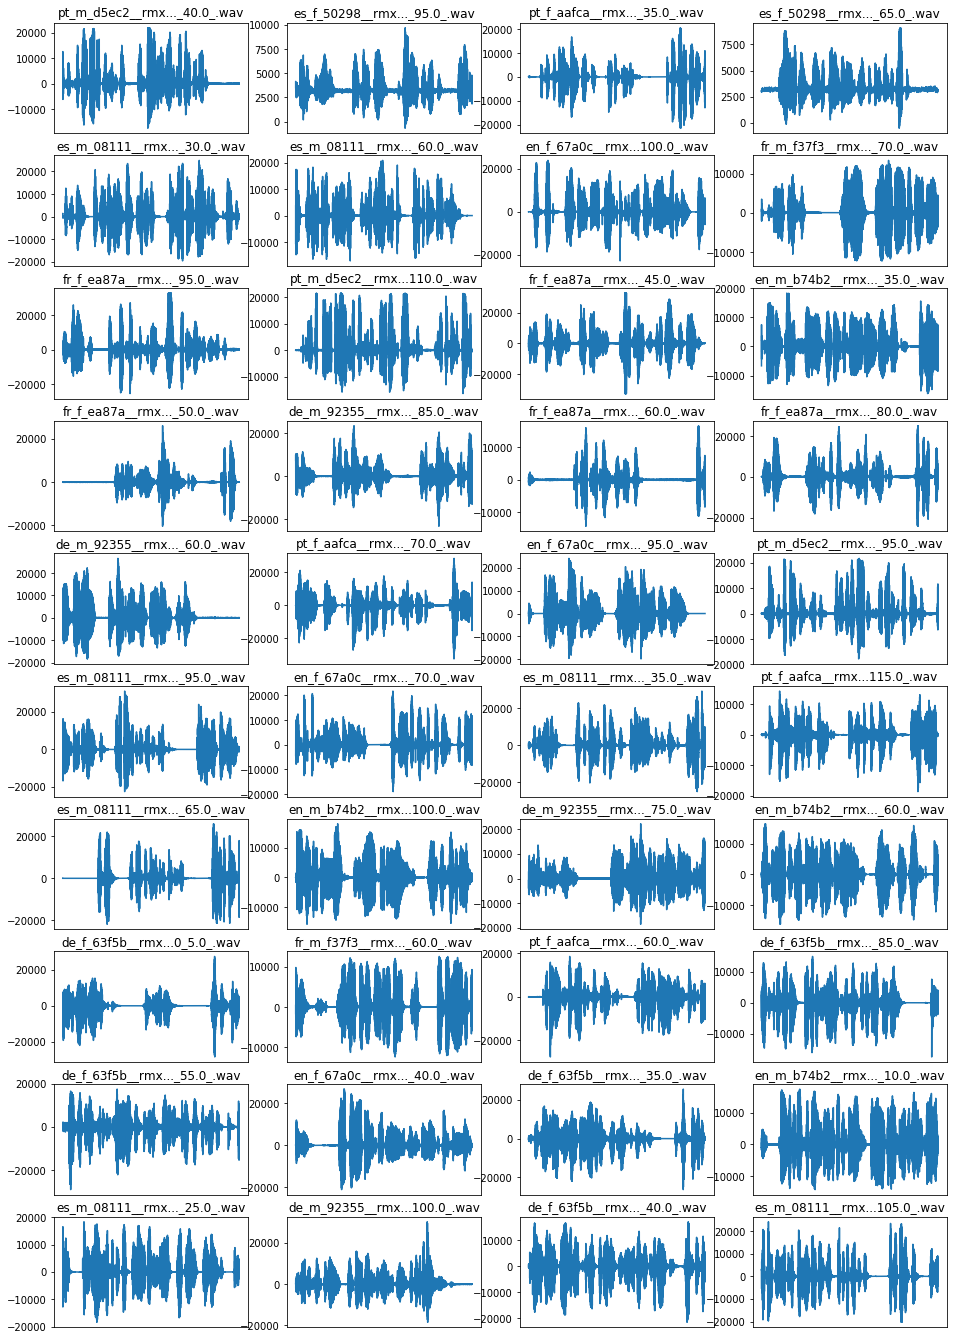

In [30]:
fig, ax = plt.subplots(10, 4, figsize = (16, 24))
for i, idx in enumerate(samples.head(40).index):
    ax[i//4, i%4].plot(samples['time_series'][idx])
    ax[i//4, i%4].set_title(samples['file_name'][idx][:15] + '...' + samples['file_name'][idx][-10:])
    ax[i//4, i%4].get_xaxis().set_ticks([])
fig.savefig("AudioWaveform-{}-{}".format(DATASET, GROUP), dpi=900) 

## Spectrogram

In [31]:
sr, b = wavfile.read(data['file_path'][0])

In [32]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                            fs=sample_rate,
                                            window='hann',
                                            nperseg=nperseg,
                                            noverlap=noverlap,
                                            detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

Text(0.5, 0, 'Seconds')

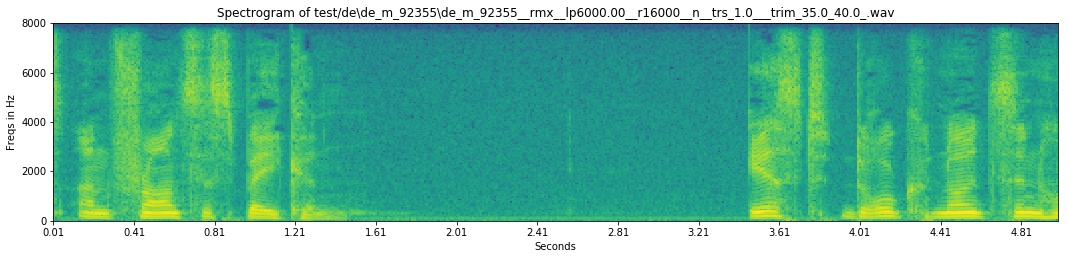

In [33]:
freqs, times, spectrogram = log_specgram(b, sr)

fig = plt.figure(figsize=(18, 8))
ax2 = fig.add_subplot(211)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::40])
ax2.set_xticks(times[::40])
ax2.set_title('Spectrogram of ' + data['file_path'][0])
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [34]:
print("Size of training data", data.shape)

Size of training data (214, 9)


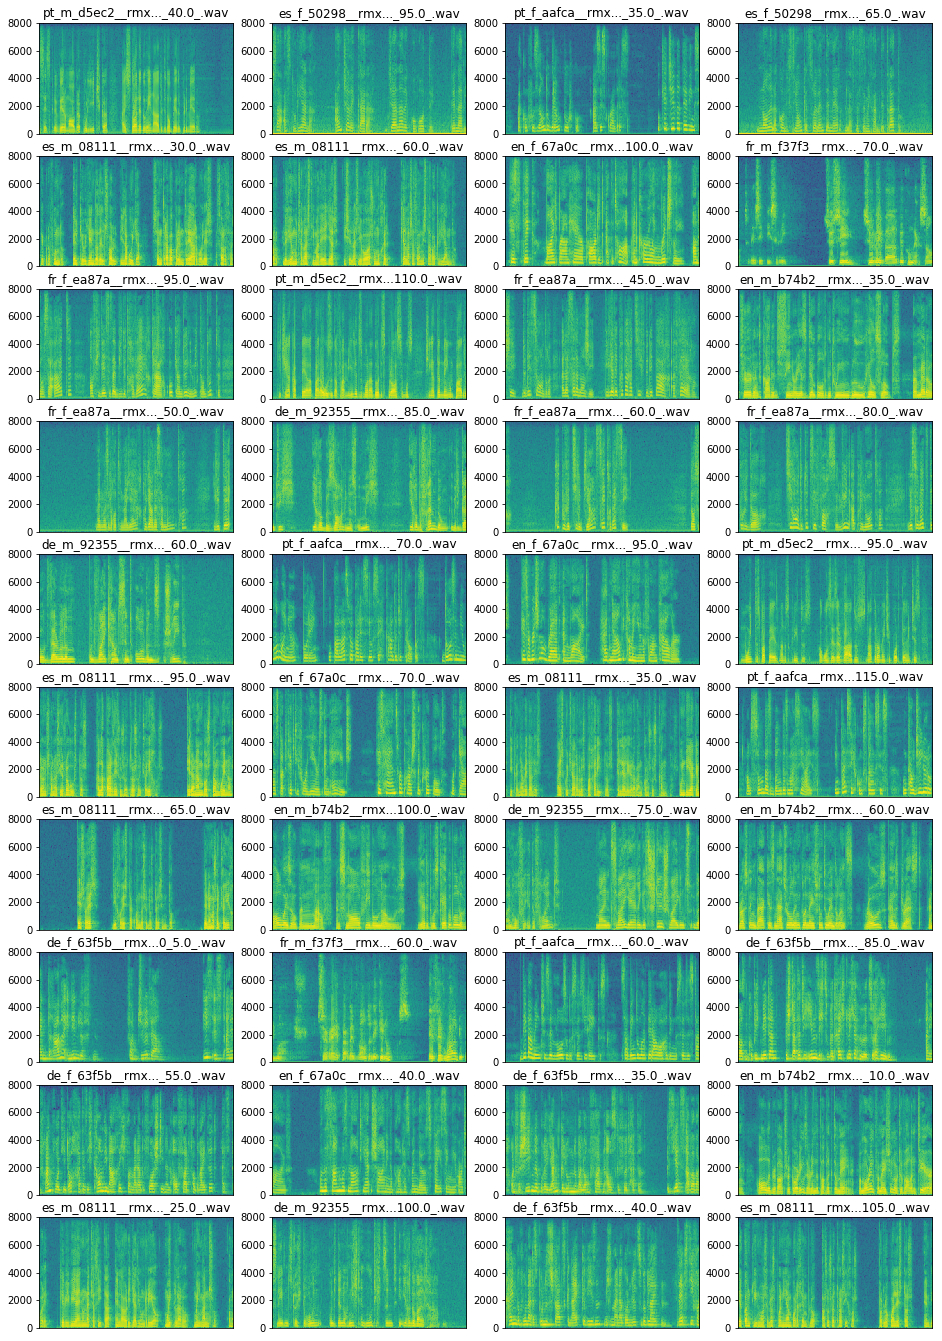

In [35]:
fig, ax = plt.subplots(10, 4, figsize = (16, 24))
for i, idx in enumerate(samples.head(40).index):
    freqs, times, spectrogram = log_specgram(samples['time_series'][idx], sr)
    ax[i//4, i%4].imshow(spectrogram.T, aspect='auto', origin='lower', 
                         extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    ax[i//4, i%4].set_yticks(freqs[::40])
    ax[i//4, i%4].set_xticks(times[::40])
    ax[i//4, i%4].set_title(samples['file_name'][idx][:15] + '...' + samples['file_name'][idx][-10:])
    ax[i//4, i%4].get_xaxis().set_ticks([])
fig.savefig("AudioSpectrograms-{}-{}".format(DATASET, GROUP), dpi=900) 

## MFCC

In [36]:
def mfcc_specgram(audio, sample_rate, nframes, n_mfcc=13):
    mfcc = librosa.feature.mfcc(np.asarray(audio, dtype='Float64'), 
                                sample_rate, n_mfcc=n_mfcc)
    times = np.linspace(0, nframes/sample_rate, mfcc.shape[0])
    freqs = np.linspace(1, n_mfcc, n_mfcc)
    return freqs, times, mfcc

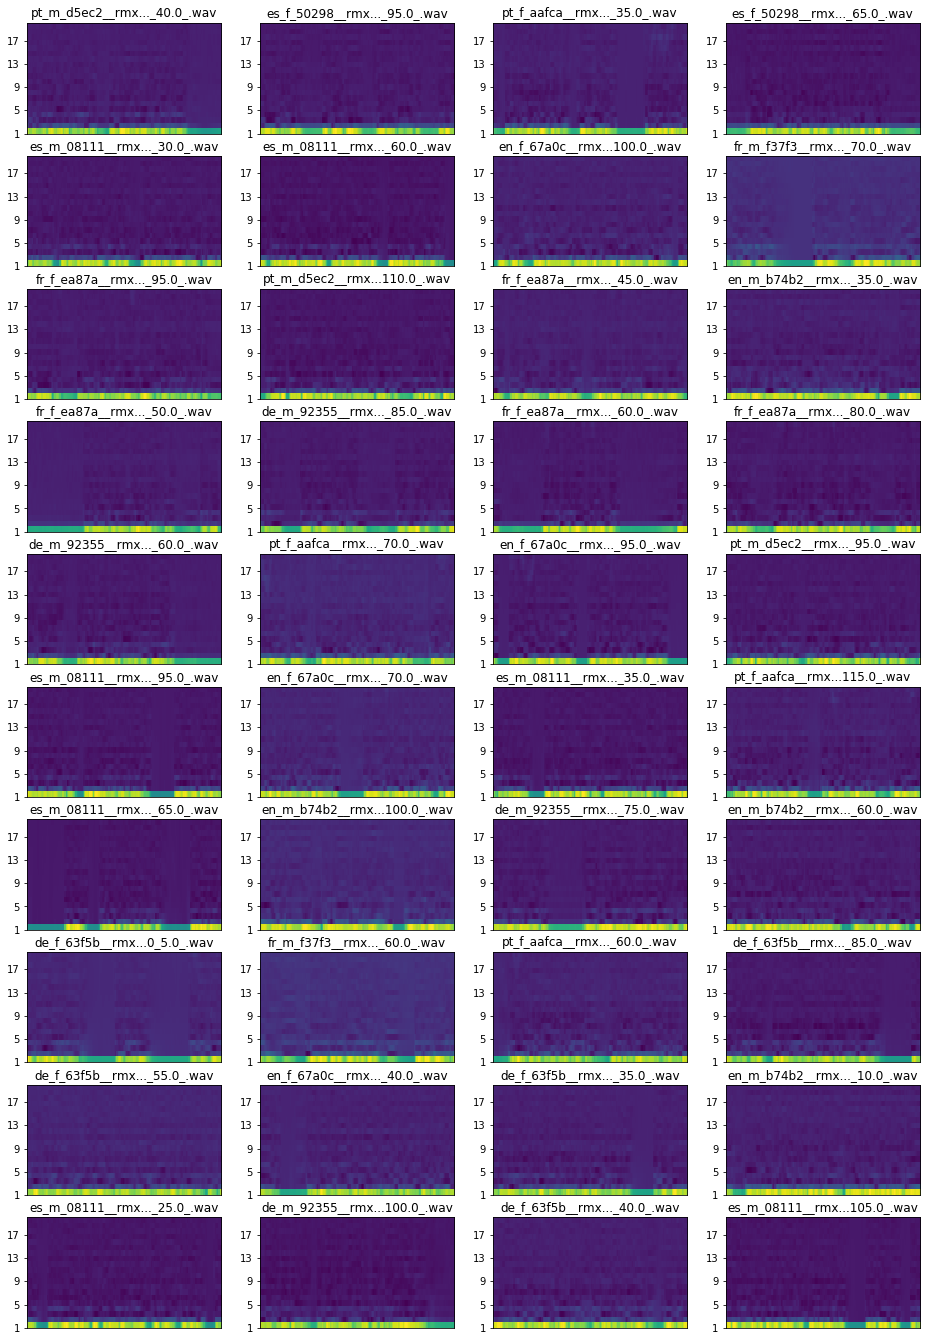

In [37]:
fig, ax = plt.subplots(10, 4, figsize = (16, 24))
for i, idx in enumerate(samples.head(40).index):
    freqs, times, spectrogram = mfcc_specgram(samples['time_series'][idx], sr,
                                              samples['nframes'][idx], n_mfcc=20)
    ax[i//4, i%4].imshow(spectrogram, aspect='auto', origin='lower', 
                         extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    ax[i//4, i%4].set_yticks(freqs[::4])
    ax[i//4, i%4].set_xticks(times[::2])
    ax[i//4, i%4].set_title(samples['file_name'][idx][:15] + '...' + samples['file_name'][idx][-10:])
    ax[i//4, i%4].get_xaxis().set_ticks([])
fig.savefig("AudioMFCCs-{}-{}".format(DATASET, GROUP), dpi=900)  

### Delta

In [38]:
def mfcc_delta_specgram(audio, sample_rate, nframes, n_mfcc=13):
    mfcc = librosa.feature.mfcc(np.asarray(audio, dtype='Float64'), 
                                sample_rate, n_mfcc=n_mfcc)
    mfcc_delta = librosa.feature.delta(mfcc)
    times = np.linspace(0, nframes/sample_rate, mfcc.shape[0])
    freqs = np.linspace(1, n_mfcc, n_mfcc)
    return freqs, times, mfcc_delta

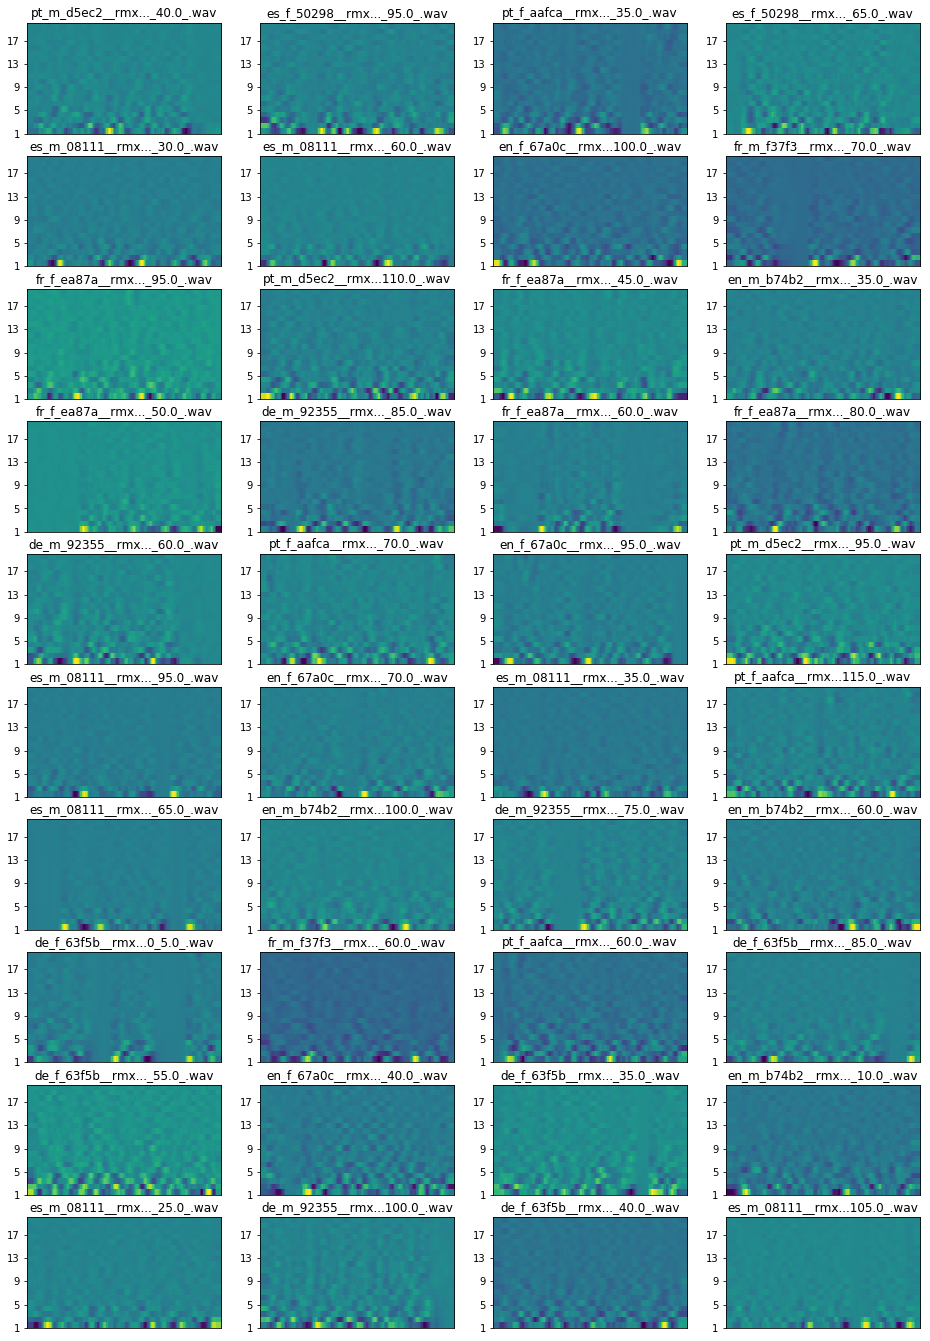

In [39]:
fig, ax = plt.subplots(10, 4, figsize = (16, 24))
for i, idx in enumerate(samples.head(40).index):
    freqs, times, spectrogram = mfcc_delta_specgram(samples['time_series'][idx], sr,
                                                    samples['nframes'][idx], n_mfcc=20)
    ax[i//4, i%4].imshow(spectrogram, aspect='auto', origin='lower', 
                         extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    ax[i//4, i%4].set_yticks(freqs[::4])
    ax[i//4, i%4].set_xticks(times[::2])
    ax[i//4, i%4].set_title(samples['file_name'][idx][:15] + '...' + samples['file_name'][idx][-10:])
    ax[i//4, i%4].get_xaxis().set_ticks([])
fig.savefig("AudioDeltas-{}-{}".format(DATASET, GROUP), dpi=900)  

### Delta Deltas

In [40]:
def mfcc_dd_specgram(audio, sample_rate, nframes, n_mfcc=13):
    mfcc = librosa.feature.mfcc(np.asarray(audio, dtype='Float64'), 
                                sample_rate, n_mfcc=n_mfcc)
    mfcc_delta = librosa.feature.delta(mfcc, order=2)
    times = np.linspace(0, nframes/sample_rate, mfcc.shape[0])
    freqs = np.linspace(1, n_mfcc, n_mfcc)
    return freqs, times, mfcc_delta

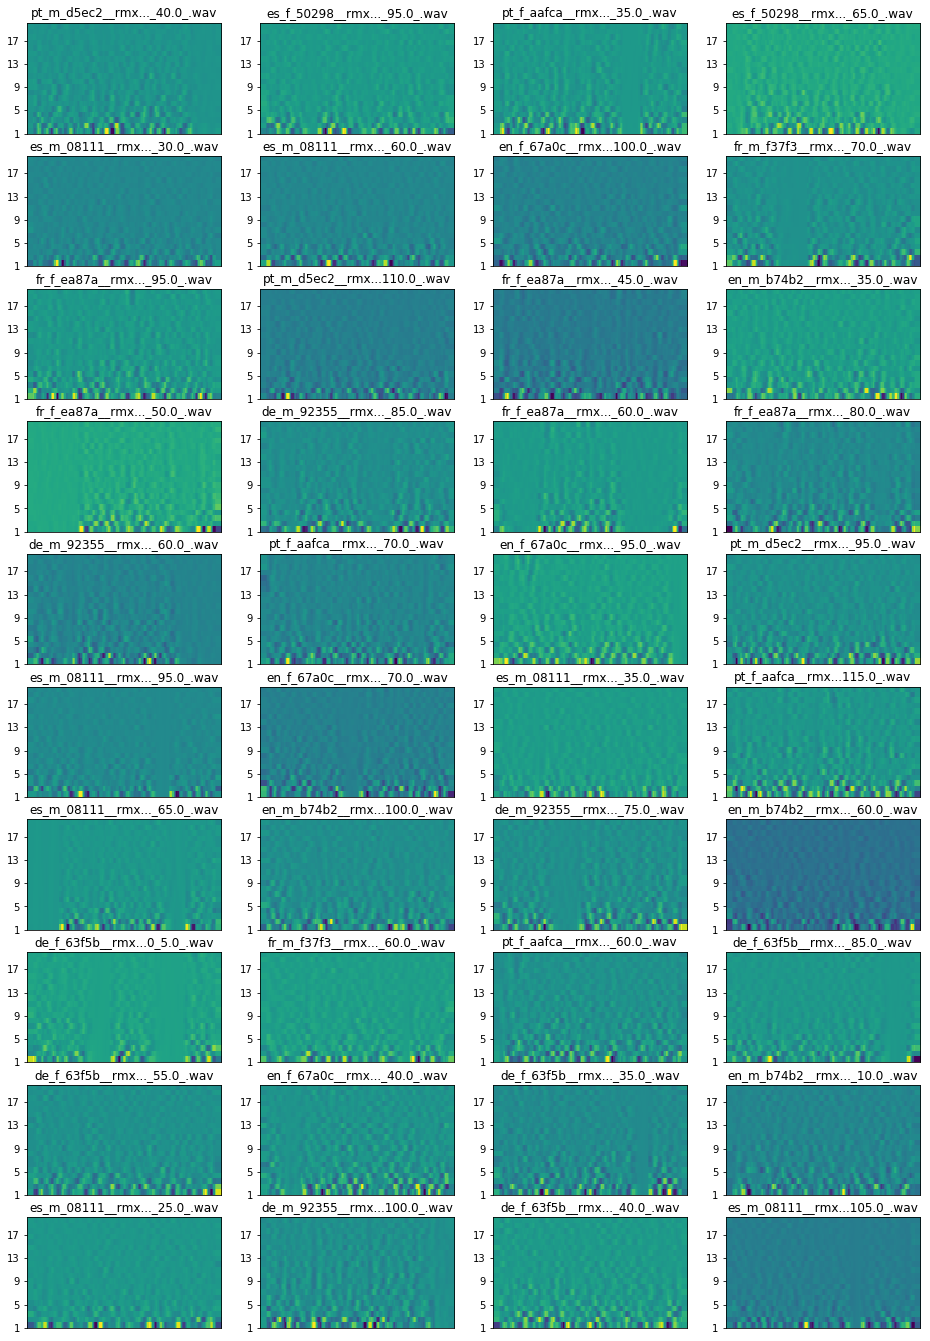

In [41]:
fig, ax = plt.subplots(10, 4, figsize = (16, 24))
for i, idx in enumerate(samples.head(40).index):
    freqs, times, spectrogram = mfcc_dd_specgram(samples['time_series'][idx], sr,
                                                 samples['nframes'][idx], n_mfcc=20)
    ax[i//4, i%4].imshow(spectrogram, aspect='auto', origin='lower', 
                         extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    ax[i//4, i%4].set_yticks(freqs[::4])
    ax[i//4, i%4].set_xticks(times[::2])
    ax[i//4, i%4].set_title(samples['file_name'][idx][:15] + '...' + samples['file_name'][idx][-10:])
    ax[i//4, i%4].get_xaxis().set_ticks([])
fig.savefig("AudioDeltaDeltas-{}-{}".format(DATASET, GROUP), dpi=900)  

## Mel Spectrogram

In [42]:
def mel_specgram(audio, sample_rate, nframes):
    spec = librosa.feature.melspectrogram(np.asarray(audio, dtype='Float64'), 
                                          sample_rate)
    times = np.linspace(0, nframes/sample_rate, spec.shape[0])
    freqs = np.linspace(1, spec.shape[1], spec.shape[1])
    return freqs, times, spec

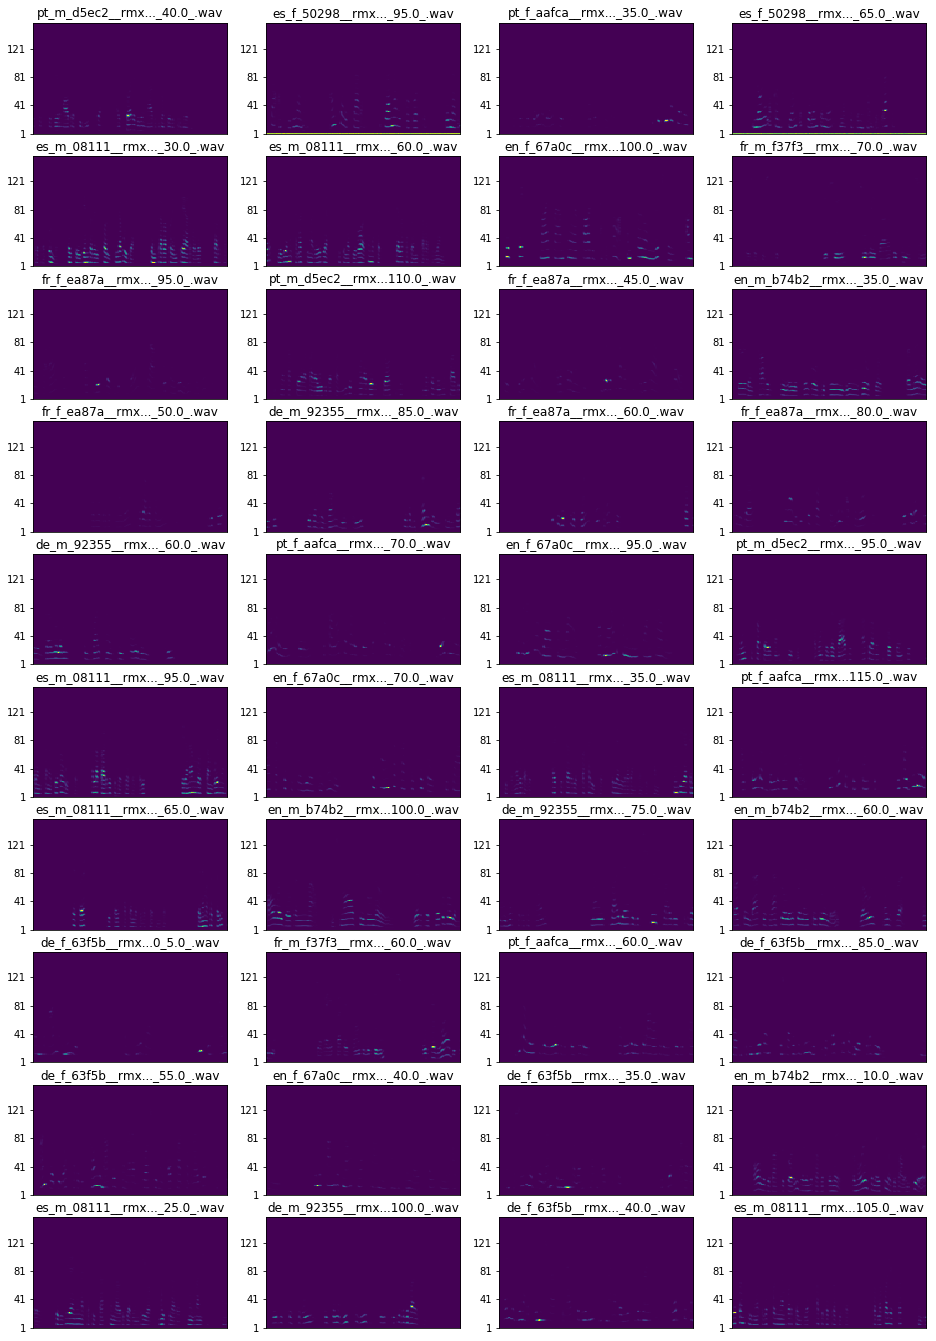

In [43]:
fig, ax = plt.subplots(10, 4, figsize = (16, 24))
for i, idx in enumerate(samples.head(40).index):
    freqs, times, spectrogram = mel_specgram(samples['time_series'][idx], sr,
                                             samples['nframes'][idx])
    ax[i//4, i%4].imshow(spectrogram, aspect='auto', origin='lower', 
                         extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    ax[i//4, i%4].set_yticks(freqs[::40])
    ax[i//4, i%4].set_xticks(times[::2])
    ax[i//4, i%4].set_title(samples['file_name'][idx][:15] + '...' + samples['file_name'][idx][-10:])
    ax[i//4, i%4].get_xaxis().set_ticks([])
fig.savefig("AudioMelSpecs-{}-{}".format(DATASET, GROUP), dpi=900)  